In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/THESIS DATASET - Sheet1.csv', encoding='ISO-8859-1')
# Clean the data
def clean_text(text):
    if isinstance(text, str):  # Check if text is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
        return text
    else:
        return ''

df['Tweets'] = df['Tweets'].apply(clean_text)
df.drop(df[df['Tweets'] == ''].index, inplace=True)
df.dropna(inplace=True)

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Tweets'], df['Labels'], test_size=0.2, random_state=42)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
# Vectorize the text data using TF-IDF
# tfidf = TfidfVectorizer()
# X_train = tfidf.fit_transform(X_train)
# X_test = tfidf.transform(X_test)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [ ]:
# Train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
sv_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, sv_pred)
print('SVM accuracy:', svm_accuracy)
svm_report = classification_report(y_test, sv_pred)
print("SVM classification report:\n", svm_report)

SVM accuracy: 0.8888888888888888
SVM classification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       374
           1       0.89      0.90      0.90       472
           2       0.81      0.80      0.81       510
           3       0.94      0.98      0.96       425
           4       0.89      0.90      0.89       745
           5       0.85      0.82      0.84       471

    accuracy                           0.89      2997
   macro avg       0.89      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997



In [ ]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print('Random Forest accuracy:', rf_accuracy)
rf_report = classification_report(y_test, rf_pred)
print("Random Forest classification report:\n", rf_report)

Random Forest accuracy: 0.8958958958958959
Random Forest classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       374
           1       0.98      0.91      0.94       472
           2       0.94      0.71      0.81       510
           3       0.97      0.95      0.96       425
           4       0.78      0.97      0.87       745
           5       0.87      0.86      0.86       471

    accuracy                           0.90      2997
   macro avg       0.92      0.89      0.90      2997
weighted avg       0.91      0.90      0.90      2997



In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print('Naive Bayes accuracy:', nb_accuracy)
nb_report = classification_report(y_test, nb_pred)
print("Naive Bayes classification report:\n", nb_report)

Naive Bayes accuracy: 0.8241574908241575
Naive Bayes classification report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       374
           1       0.89      0.79      0.84       472
           2       0.83      0.65      0.73       510
           3       0.98      0.74      0.84       425
           4       0.75      0.98      0.85       745
           5       0.72      0.79      0.75       471

    accuracy                           0.82      2997
   macro avg       0.85      0.81      0.83      2997
weighted avg       0.84      0.82      0.82      2997



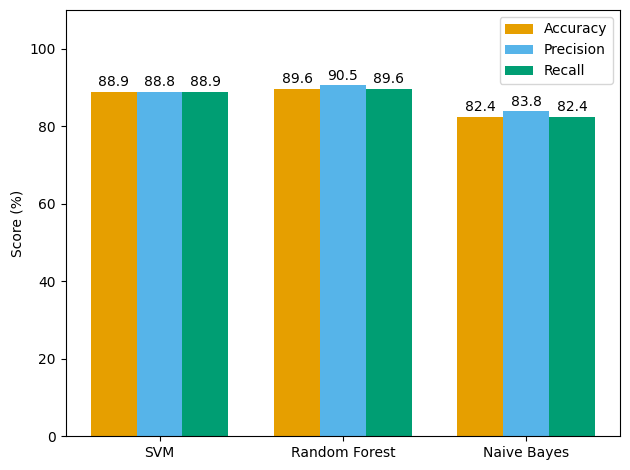

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score

# SVM model results
svm_acc = svm_accuracy * 100
svm_precision = precision_score(y_test, sv_pred, average='weighted') * 100
svm_recall = recall_score(y_test, sv_pred, average='weighted') * 100

# Random Forest model results
rf_acc = rf_accuracy * 100
rf_precision = precision_score(y_test, rf_pred, average='weighted') * 100
rf_recall = recall_score(y_test, rf_pred, average='weighted') * 100

# Naive Bayes model results
nb_acc = nb_accuracy * 100
nb_precision = precision_score(y_test, nb_pred, average='weighted') * 100
nb_recall = recall_score(y_test, nb_pred, average='weighted') * 100

# Set color scheme
colors = ['#e69f00', '#56b4e9', '#009e73']

# Generate bar chart
x_labels = ['SVM', 'Random Forest', 'Naive Bayes']
width = 0.25
x = np.arange(len(x_labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, [svm_acc, rf_acc, nb_acc], width, label='Accuracy', color=colors[0])
rects2 = ax.bar(x, [svm_precision, rf_precision, nb_precision], width, label='Precision', color=colors[1])
rects3 = ax.bar(x + width, [svm_recall, rf_recall, nb_recall], width, label='Recall', color=colors[2])

# Add labels, title, legend
ax.set_ylabel('Score (%)')
ax.set_ylim([0, 110])
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

# Add value labels to each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.show()

**Deep Learning**

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Labels'] = label_encoder.fit_transform(df['Labels'])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Tweets'], df['Labels'], test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)   # for numerical conversion
X_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)  # to make sentence length same
X_test = pad_sequences(X_test, maxlen=maxlen)

# Convert the labels to one-hot encoding
num_classes = 6
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
# Define the LSTM model
embedding_dim = 128
lstm_units = 64
dropout_rate = 0.2
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(units=lstm_units))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
# early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)



Epoch 1/10
338/338 [==============================] - 25s 66ms/step - loss: 0.8421 - accuracy: 0.6853 - val_loss: 0.3323 - val_accuracy: 0.8766
Epoch 2/10
338/338 [==============================] - 5s 14ms/step - loss: 0.2852 - accuracy: 0.9074 - val_loss: 0.2839 - val_accuracy: 0.9008
Epoch 3/10
338/338 [==============================] - 6s 17ms/step - loss: 0.1575 - accuracy: 0.9474 - val_loss: 0.2833 - val_accuracy: 0.8941
Epoch 4/10
338/338 [==============================] - 6s 18ms/step - loss: 0.1163 - accuracy: 0.9626 - val_loss: 0.2888 - val_accuracy: 0.8974
Epoch 5/10
338/338 [==============================] - 4s 13ms/step - loss: 0.0911 - accuracy: 0.9692 - val_loss: 0.3200 - val_accuracy: 0.8991
Epoch 6/10
338/338 [==============================] - 5s 14ms/step - loss: 0.0731 - accuracy: 0.9766 - val_loss: 0.3486 - val_accuracy: 0.8849
Epoch 7/10
338/338 [==============================] - 4s 11ms/step - loss: 0.0606 - accuracy: 0.9803 - val_loss: 0.4065 - val_accuracy: 0.892

In [ ]:
from sklearn.metrics import classification_report
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Display the classification report
target_names = label_encoder.classes_
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))


94/94 [==============================] - 1s 5ms/step
                  precision    recall  f1-score   support

        atypical       0.96      0.97      0.96       374
         bipolar       0.88      0.88      0.88       472
major depressive       0.77      0.84      0.81       510
              no       0.95      0.90      0.92       425
      postpartum       0.89      0.90      0.90       745
       psychotic       0.86      0.80      0.83       471

        accuracy                           0.88      2997
       macro avg       0.89      0.88      0.88      2997
    weighted avg       0.88      0.88      0.88      2997



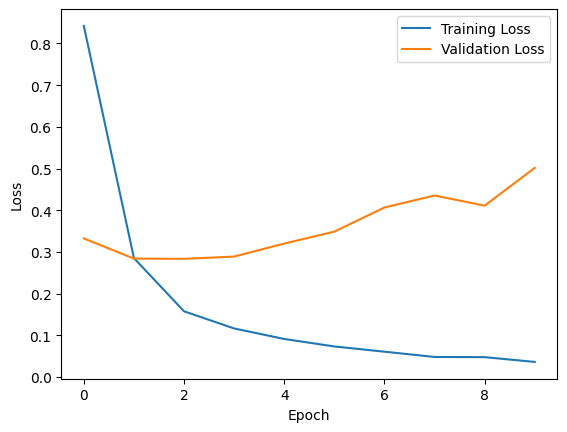

In [ ]:
# Plot the training and validation loss over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

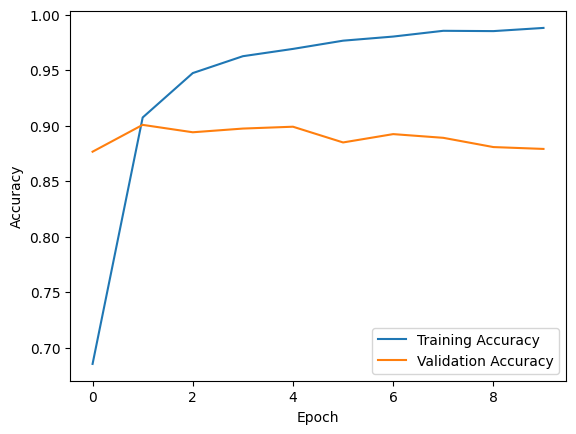

In [ ]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 27.6 MB/s eta 0:00:00


In [ ]:
import random
import shap

explainer = shap.KernelExplainer(model, X_train[:50,:])

In [ ]:
shap.initjs()

In [ ]:
idx = random.randint(0,len(X_test))

In [ ]:
shap_values = explainer.shap_values(X_test[idx:idx+1], nsamples=100)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
text = tokenizer.sequences_to_texts(X_test[idx:idx+1])[0].split()

In [ ]:
print(' '.join(text))

judged mom two works hour days ptsd major depressive disorder someone mad dont personal trainer money new clothes


In [ ]:
feature_names = ['<pad>']*(maxlen - len(text)) + text

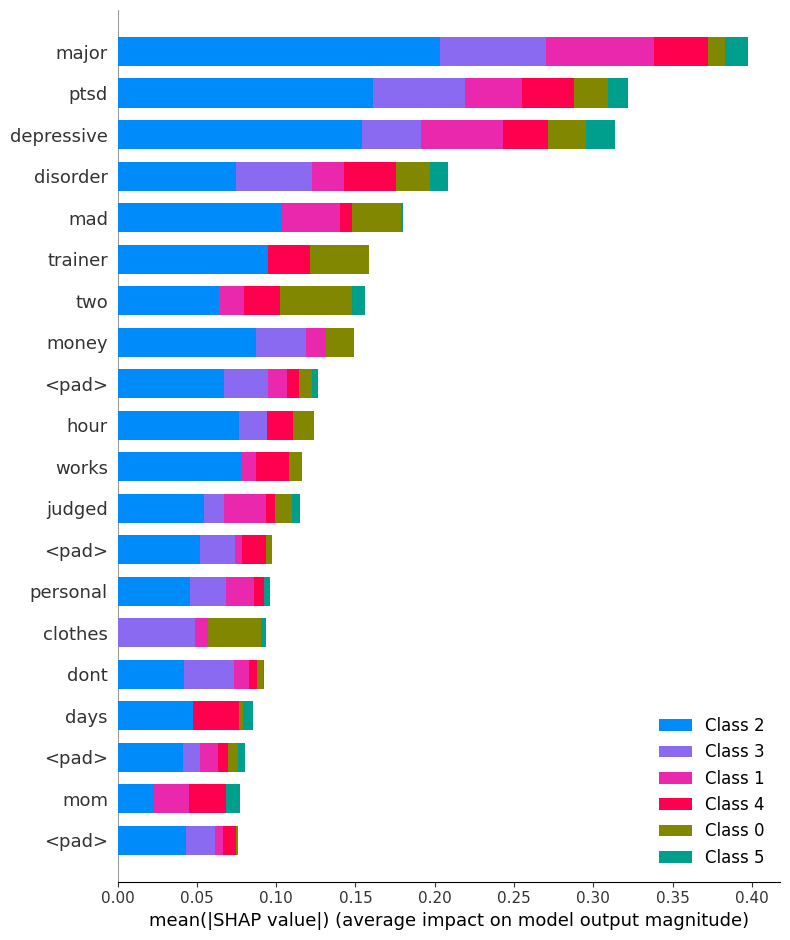

In [ ]:
shap.summary_plot(shap_values, X_test[idx:idx+1], feature_names=feature_names)

**CNN**

In [ ]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
# Define the CNN model
embedding_dim = 128
filter_sizes = [3, 4, 5]
num_filters = 64
dropout_rate = 0.5

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=num_filters, kernel_size=filter_sizes[0], activation='relu'))
model.add(MaxPooling1D(pool_size=2)) 
model.add(Conv1D(filters=num_filters, kernel_size=filter_sizes[1], activation='relu'))
model.add(MaxPooling1D(pool_size=2)) 
model.add(Conv1D(filters=num_filters, kernel_size=filter_sizes[2], activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=num_classes, activation='softmax'))


# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
338/338 [==============================] - 27s 58ms/step - loss: 0.9949 - accuracy: 0.5993 - val_loss: 0.3409 - val_accuracy: 0.8832
Epoch 2/10
338/338 [==============================] - 6s 17ms/step - loss: 0.3416 - accuracy: 0.8868 - val_loss: 0.2971 - val_accuracy: 0.8932
Epoch 3/10
338/338 [==============================] - 3s 8ms/step - loss: 0.2224 - accuracy: 0.9267 - val_loss: 0.3149 - val_accuracy: 0.8941
Epoch 4/10
338/338 [==============================] - 4s 11ms/step - loss: 0.1509 - accuracy: 0.9480 - val_loss: 0.3238 - val_accuracy: 0.8974
Epoch 5/10
338/338 [==============================] - 3s 9ms/step - loss: 0.1275 - accuracy: 0.9561 - val_loss: 0.3842 - val_accuracy: 0.8899
Epoch 6/10
338/338 [==============================] - 3s 8ms/step - loss: 0.0981 - accuracy: 0.9671 - val_loss: 0.4374 - val_accuracy: 0.8891
Epoch 7/10
338/338 [==============================] - 3s 10ms/step - loss: 0.0675 - accuracy: 0.9782 - val_loss: 0.4804 - val_accuracy: 0.8949
E

In [ ]:
from sklearn.metrics import classification_report
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Display the classification report
target_names = label_encoder.classes_
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

94/94 [==============================] - 0s 2ms/step
                  precision    recall  f1-score   support

        atypical       0.96      0.97      0.96       374
         bipolar       0.86      0.90      0.88       472
major depressive       0.78      0.82      0.80       510
              no       0.93      0.82      0.87       425
      postpartum       0.89      0.90      0.89       745
       psychotic       0.83      0.82      0.83       471

        accuracy                           0.87      2997
       macro avg       0.88      0.87      0.87      2997
    weighted avg       0.87      0.87      0.87      2997



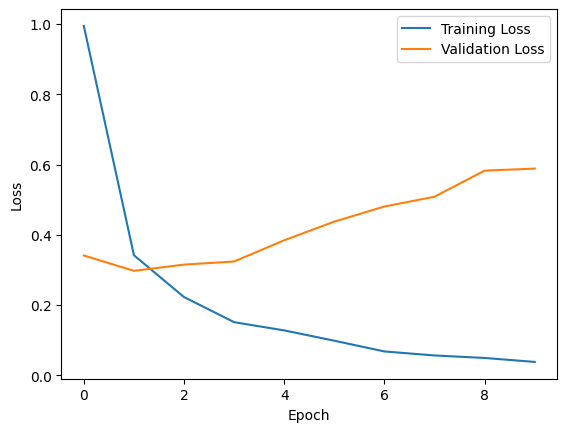

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

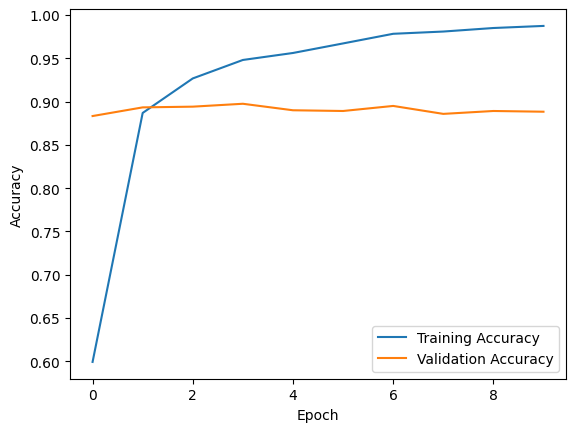

In [ ]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**With Glove**

In [5]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
# Load the dataset
df = pd.read_csv('/content/THESIS DATASET - Sheet1.csv',encoding='ISO-8859-1')
def clean_text(text):
          if isinstance(text, str):  # Check if text is a string
              text = text.lower()  # Convert to lowercase
              text = re.sub(r'\d+', '', text)  # Remove numbers
              text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
              text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
              return text
          else:
              return ''

df['Tweets'] = df['Tweets'].apply(clean_text)
df.drop(df[df['Tweets'] == ''].index, inplace=True)
df.dropna(inplace=True)
label_encoder = LabelEncoder()
df['Labels'] = label_encoder.fit_transform(df['Labels'])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Tweets'], df['Labels'], test_size=0.2, random_state=42)

In [6]:
!wget "https://nlp.stanford.edu/data/glove.6B.zip"

--2023-05-17 17:13:35--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-05-17 17:13:35--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  4.91MB/s    in 2m 42s  

2023-05-17 17:16:17 (5.07 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [7]:
!unzip "glove.6B.zip"

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [9]:
# Load the embeddings into a dictionary
embedding_dict = {}
with open("glove.6B.300d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_dict[word] = coefs

In [10]:
# Tokenize the input data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
max_len=100
# Pad the sequences to have a fixed length
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

# Create an embedding matrix for the model
embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


LSTM with Glove

In [11]:
# Define the model architecture
lstm_units = 300
dropout_rate = 0.4
num_classes = 6
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(LSTM(units=lstm_units))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=num_classes, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])

# Train the model
# history=model.fit(X_train, to_categorical(y_train, num_classes), validation_data=(X_test, to_categorical(y_test, num_classes)), epochs=10, batch_size=64)

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


# # Evaluate the model on the test set
# loss, accuracy = model.evaluate(X_test, to_categorical(y_test, num_classes), verbose=0)
# print('Test accuracy:', accuracy)

Epoch 1/10
222/222 [==============================] - 11s 14ms/step - loss: 1.3980 - accuracy: 0.3157 - val_loss: 1.2581 - val_accuracy: 0.3426
Epoch 2/10
222/222 [==============================] - 2s 10ms/step - loss: 1.1710 - accuracy: 0.4245 - val_loss: 0.9862 - val_accuracy: 0.5939
Epoch 3/10
222/222 [==============================] - 2s 10ms/step - loss: 1.1082 - accuracy: 0.5100 - val_loss: 1.3534 - val_accuracy: 0.3477
Epoch 4/10
222/222 [==============================] - 2s 10ms/step - loss: 1.0508 - accuracy: 0.5161 - val_loss: 0.9545 - val_accuracy: 0.5368
Epoch 5/10
222/222 [==============================] - 2s 10ms/step - loss: 0.9527 - accuracy: 0.5791 - val_loss: 0.9870 - val_accuracy: 0.6206
Epoch 6/10
222/222 [==============================] - 2s 11ms/step - loss: 0.8741 - accuracy: 0.6370 - val_loss: 0.9945 - val_accuracy: 0.5787
Epoch 7/10
222/222 [==============================] - 2s 10ms/step - loss: 1.0606 - accuracy: 0.5406 - val_loss: 1.0681 - val_accuracy: 0.571

In [17]:
from sklearn.metrics import classification_report
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Display the classification report
target_names = label_encoder.classes_
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

62/62 [==============================] - 0s 7ms/step
                  precision    recall  f1-score   support

        atypical       0.97      0.89      0.93       395
         bipolar       0.50      0.00      0.01       315
major depressive       0.55      0.92      0.69       317
              no       0.87      0.99      0.92       390
      postpartum       0.48      0.98      0.64       308
       psychotic       0.00      0.00      0.00       245

        accuracy                           0.68      1970
       macro avg       0.56      0.63      0.53      1970
    weighted avg       0.61      0.68      0.58      1970



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.metrics import classification_report
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Display the classification report
target_names = label_encoder.classes_
print(classification_report(y_test, y_pred, target_names=target_names))

62/62 [==============================] - 1s 6ms/step


ValueError: ignored

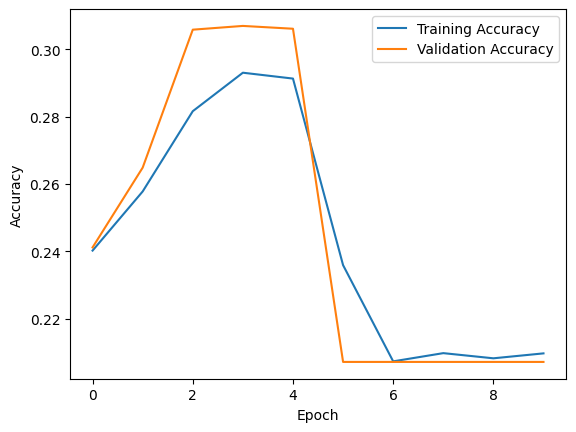

In [ ]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


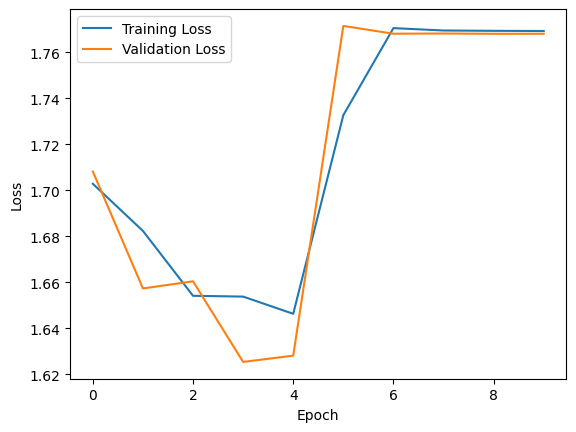

In [ ]:
# Plot the training and validation loss over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

CNN with Glove

In [ ]:
# Define the model architecture
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, to_categorical(y_train, num_classes), validation_data=(X_test, to_categorical(y_test, num_classes)), epochs=10, batch_size=64)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, to_categorical(y_test, num_classes), verbose=0)
print('Test accuracy:', accuracy)

Epoch 1/10
225/225 [==============================] - 4s 8ms/step - loss: 0.9164 - accuracy: 0.6684 - val_loss: 0.4968 - val_accuracy: 0.8299
Epoch 2/10
225/225 [==============================] - 1s 5ms/step - loss: 0.4209 - accuracy: 0.8562 - val_loss: 0.4280 - val_accuracy: 0.8525
Epoch 3/10
225/225 [==============================] - 1s 5ms/step - loss: 0.3281 - accuracy: 0.8879 - val_loss: 0.4411 - val_accuracy: 0.8442
Epoch 4/10
225/225 [==============================] - 1s 5ms/step - loss: 0.2603 - accuracy: 0.9134 - val_loss: 0.3890 - val_accuracy: 0.8575
Epoch 5/10
225/225 [==============================] - 1s 5ms/step - loss: 0.2099 - accuracy: 0.9311 - val_loss: 0.4091 - val_accuracy: 0.8614
Epoch 6/10
225/225 [==============================] - 1s 5ms/step - loss: 0.1730 - accuracy: 0.9428 - val_loss: 0.4011 - val_accuracy: 0.8673
Epoch 7/10
225/225 [==============================] - 1s 5ms/step - loss: 0.1325 - accuracy: 0.9610 - val_loss: 0.4109 - val_accuracy: 0.8653
Epoch 

In [ ]:
from sklearn.metrics import classification_report
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Display the classification report
target_names = label_encoder.classes_
print(classification_report(y_test, y_pred, target_names=target_names))

113/113 [==============================] - 0s 2ms/step
                  precision    recall  f1-score   support

        atypical       0.86      0.90      0.88       696
         bipolar       0.90      0.89      0.89       677
major depressive       0.74      0.77      0.75       613
              no       0.94      0.96      0.95       384
      postpartum       0.86      0.90      0.88       743
       psychotic       0.90      0.74      0.81       474

        accuracy                           0.86      3587
       macro avg       0.87      0.86      0.86      3587
    weighted avg       0.86      0.86      0.86      3587



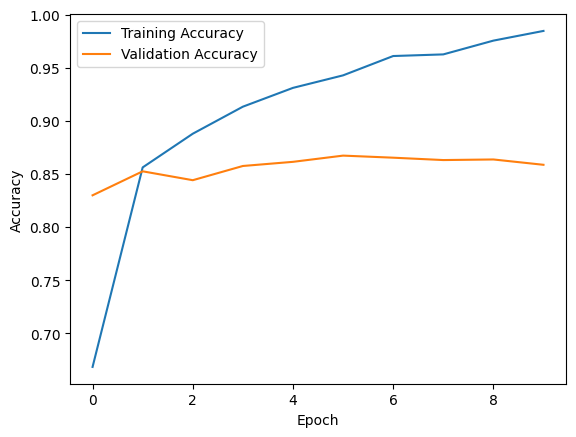

In [ ]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


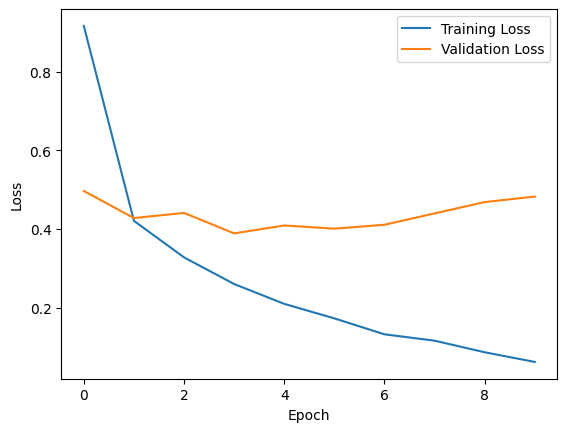

In [ ]:
# Plot the training and validation loss over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**BERT**

In [ ]:
!pip install ktrain
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 73.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 56.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 44.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Prepari

In [ ]:
!pip3 install git+https://github.com/amaiya/eli5@tfkeras_0_10_1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/amaiya/eli5 (to revision tfkeras_0_10_1) to /tmp/pip-req-build-p_mktihj
  Running command git clone --filter=blob:none --quiet https://github.com/amaiya/eli5 /tmp/pip-req-build-p_mktihj
  Running command git checkout -b tfkeras_0_10_1 --track origin/tfkeras_0_10_1
  Switched to a new branch 'tfkeras_0_10_1'
  Branch 'tfkeras_0_10_1' set up to track remote branch 'tfkeras_0_10_1' from 'origin'.
  Resolved https://github.com/amaiya/eli5 to commit 72a5106bb9bcb8eb6a9b550ce3c0561eeb1fd2b3
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.10.1-py2.py3-none-any.whl size=106890 sha256=cb5483c8da47c0d2b2012db8ba0933c780e1ec5a2360f14036962b759280c968
  Stored in directory: /tmp/pip-ephem-wheel-cache-sg708smr/wheels/41/be/96/f26004471ff0430818c8024206fd786477debb15fae14b39c8
Successfully built eli5


In [ ]:
import ktrain
import random 
import pickle
import torch
import time
import transformers
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow.keras.utils as ku
import torch.nn as nn
from ktrain import text

In [ ]:
device = torch.device("cuda")

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/THESIS DATASET - Sheet1.csv', encoding='ISO-8859-1')
# Clean the data
def clean_text(text):
    if isinstance(text, str):  # Check if text is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
        return text
    else:
        return ''

df['Tweets'] = df['Tweets'].apply(clean_text)
df.drop(df[df['Tweets'] == ''].index, inplace=True)
df.dropna(inplace=True)

In [ ]:
train_data = df

In [ ]:
(X_train, Y_train) , (X_test, Y_test), preprocess = text.texts_from_df(train_df= df, 
                                                                       text_column= 'Tweets', 
                                                                       label_columns= 'Labels',
                                                                       maxlen = 100,
                                                                       preprocess_mode = 'bert')  

['atypical', 'bipolar', 'major depressive', 'no', 'postpartum', 'psychotic']
       atypical  bipolar  major depressive   no  postpartum  psychotic
6078        1.0      0.0               0.0  0.0         0.0        0.0
4663        0.0      1.0               0.0  0.0         0.0        0.0
11257       0.0      0.0               0.0  0.0         1.0        0.0
3246        0.0      0.0               0.0  0.0         0.0        1.0
2249        0.0      0.0               1.0  0.0         0.0        0.0
['atypical', 'bipolar', 'major depressive', 'no', 'postpartum', 'psychotic']
       atypical  bipolar  major depressive   no  postpartum  psychotic
230         0.0      0.0               0.0  0.0         1.0        0.0
1284        0.0      0.0               0.0  0.0         1.0        0.0
7006        1.0      0.0               0.0  0.0         0.0        0.0
13454       0.0      0.0               1.0  0.0         0.0        0.0
3686        0.0      0.0               0.0  0.0         0.0      

Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
model = text.text_classifier(name='bert', 
                             train_data = (X_train, Y_train),
                             preproc = preprocess)

Is Multi-Label? False
maxlen is 100


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [ ]:
learner = ktrain.get_learner(model = model,
                             train_data = (X_train, Y_train),
                             val_data = (X_test, Y_test),
                             batch_size = 64)

In [ ]:
# learner.lr_find(show_plot=True)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
 36/232 [===>..........................] - ETA: 3:59 - loss: 1.9996 - accuracy: 0.1840

In [ ]:
# learner.lr_plot()

In [ ]:
learner.fit_onecycle(0.0001,6)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/6
211/211 [==============================] - 306s 1s/step - loss: 0.6208 - accuracy: 0.7772 - val_loss: 0.2755 - val_accuracy: 0.8866
Epoch 2/6
211/211 [==============================] - 286s 1s/step - loss: 0.2217 - accuracy: 0.9205 - val_loss: 0.2277 - val_accuracy: 0.9139
Epoch 3/6
211/211 [==============================] - 286s 1s/step - loss: 0.1655 - accuracy: 0.9417 - val_loss: 0.2327 - val_accuracy: 0.9126
Epoch 4/6
211/211 [==============================] - 286s 1s/step - loss: 0.1300 - accuracy: 0.9560 - val_loss: 0.2026 - val_accuracy: 0.9306
Epoch 5/6
211/211 [==============================] - 286s 1s/step - loss: 0.0552 - accuracy: 0.9812 - val_loss: 0.2348 - val_accuracy: 0.9420
Epoch 6/6
211/211 [==============================] - 286s 1s/step - loss: 0.0193 - accuracy: 0.9949 - val_loss: 0.2563 - val_accuracy: 0.9393


In [ ]:
learner.validate(val_data=(X_test, Y_test))

47/47 [==============================] - 11s 232ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       220
           1       0.94      0.96      0.95       232
           2       0.87      0.88      0.87       258
           3       0.98      0.98      0.98       192
           4       0.94      0.94      0.94       367
           5       0.92      0.90      0.91       230

    accuracy                           0.94      1499
   macro avg       0.94      0.94      0.94      1499
weighted avg       0.94      0.94      0.94      1499



array([[218,   1,   0,   1,   0,   0],
       [  1, 222,   4,   0,   2,   3],
       [  1,   5, 226,   0,  14,  12],
       [  0,   1,   0, 189,   1,   1],
       [  0,   3,  17,   0, 346,   1],
       [  0,   3,  13,   2,   5, 207]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preprocess)

In [ ]:
learner.view_top_losses(n=2, preproc=preprocess)

47/47 [==============================] - 11s 236ms/step
----------
id:887 | loss:10.16 | true:bipolar | pred:postpartum)

[CLS] like im constant battle person want person depression making hard know version real one [SEP]
----------
id:1105 | loss:9.97 | true:psychotic | pred:no)

[CLS] emotions place go happy sad angry matter minutes [SEP]


In [ ]:
import numpy as np
X_test_reviews =train_data['Tweets'].values
X_test_reviews[0]

X_test_len = [len(r) for r in X_test_reviews]
id = X_test_len.index(np.percentile(X_test_len, 90))
X_test_reviews[id]

'keshab_mahanta hello health minister siri working mother irrigation department government assam maternity leave suffering depressionits tough handle situation baby months old'

In [ ]:
X_test_reviews[4000]

'wish could escape darkness like black hole sucking deeper deeper'

In [ ]:
!pip install https://github.com/amaiya/eli5-tf/archive/refs/heads/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 6.9 MB 13.4 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=108052 sha256=90c7da7c221c7c2df7eaf4b0e671f5f1f98a53785d7871a649fa27c8884f2d04
  Stored in directory: /tmp/pip-ephem-wheel-cache-5ewanp_e/wheels/0b/14/54/23c07f7254b733dc3daac99ba1fda60e30f1b2991b3b8ee0bf
Successfully built eli5
  Attempting uninstall: eli5
    Found existing installation: eli5 0.10.1
    Uninstalling eli5-0.10.1:
      Successfully uninstalled eli5-0.10.1


In [ ]:
predictor.explain(X_test_reviews[id])

In [ ]:
predictor.predict('I am sorry for all of the men suffering from  depression. Its good for them they didnt have to produce the baby.')

'postpartum'

In [ ]:
predictor.explain('I am sorry for all of the men suffering from  depression. Its good for them they didnt have to produce the baby.')

In [ ]:
predictor.predict('My baby deserves a happy mom, but I feel like I m failing him. I cant shake this feeling of sadness and guilt.')

'postpartum'

In [ ]:
predictor.explain('I think i have a mild case of hypersomnia because lately i can fall asleep laterally anytime of the day as long as a close my eyes.)

SyntaxError: ignored

In [ ]:
predictor.predict('The darkness inside my head is like a black hole, sucking me in and never letting go. Its hard to find any light in the darkness.')

'psychotic'

In [ ]:
predictor.explain('The darkness inside my head is like a black hole, sucking me in. Its hard to find any light in the darkness.')

In [ ]:
predictor.predict('I m trapped in a never-ending cycle of sadness and despair. Its like I m stuck in a deep, dark hole with no way out.')

'psychotic'

In [ ]:
predictor.explain('I m trapped in a never-ending cycle of sadness and despair. Its like I m stuck in a deep, dark hole with no way out.')

In [ ]:
predictor.predict('i guess shit sleep just means insomnia coz usually i have hypersomnia')

'atypical'

In [ ]:
predictor.explain('i guess shit sleep just means insomnia coz usually i have hypersomnia')

In [ ]:
predictor.predict('I live with a mental illness. I have bipolar disorder, or manic depression, the older name for it, and one I think is more accurate.')

'bipolar'

In [ ]:
predictor.explain('I live with a mental illness. I have bipolar disorder, or manic depression, the older name for it, and one I think is more accurate.')

In [ ]:
predictor.predict('I am sorry for all of the men suffering from  depression. It's good for them they didnt have to produce the baby.')

SyntaxError: ignored

In [ ]:
predictor.explain('I am sorry for all of the men suffering from  depression. Its good for them they didnt have to produce the baby.')

SyntaxError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score

# LSTM model results
svm_acc = 
svm_precision = precision_score(y_test, sv_pred, average='weighted') * 100
svm_recall = recall_score(y_test, sv_pred, average='weighted') * 100

# CNN model results
rf_acc = rf_accuracy * 100
rf_precision = precision_score(y_test, rf_pred, average='weighted') * 100
rf_recall = recall_score(y_test, rf_pred, average='weighted') * 100

# LSTM+Glove model results
nb_acc = nb_accuracy * 100
nb_precision = precision_score(y_test, nb_pred, average='weighted') * 100
nb_recall = recall_score(y_test, nb_pred, average='weighted') * 100

# CNN+Glove model results
nb_acc = nb_accuracy * 100
nb_precision = precision_score(y_test, nb_pred, average='weighted') * 100
nb_recall = recall_score(y_test, nb_pred, average='weighted') * 100



# XLM-Roberta model results
nb_acc = nb_accuracy * 100
nb_precision = precision_score(y_test, nb_pred, average='weighted') * 100
nb_recall = recall_score(y_test, nb_pred, average='weighted') * 100

# Set color scheme
colors = ['#e69f00', '#56b4e9', '#009e73']

# Generate bar chart
x_labels = ['SVM', 'Random Forest', 'Naive Bayes']
width = 0.25
x = np.arange(len(x_labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, [svm_acc, rf_acc, nb_acc], width, label='Accuracy', color=colors[0])
rects2 = ax.bar(x, [svm_precision, rf_precision, nb_precision], width, label='Precision', color=colors[1])
rects3 = ax.bar(x + width, [svm_recall, rf_recall, nb_recall], width, label='Recall', color=colors[2])

# Add labels, title, legend
ax.set_ylabel('Score (%)')
ax.set_ylim([0, 110])
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

# Add value labels to each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.show()

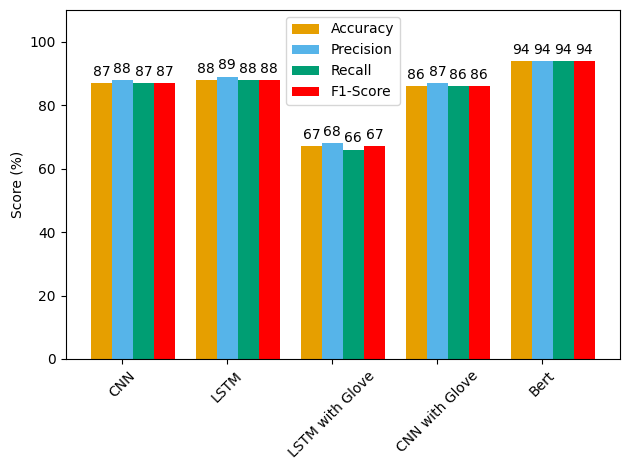

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model results
model_labels = ['CNN', 'LSTM', 'LSTM with Glove', 'CNN with Glove', 'Bert']
accuracy = [87, 88, 67, 86, 94]
precision = [88, 89, 68, 87, 94]
recall = [87, 88, 66, 86, 94]
f1=[87, 88, 67, 86, 94]

# Set color scheme
colors = ['#e69f00', '#56b4e9', '#009e73','#FF0000']

# Generate bar chart
x = np.arange(len(model_labels))
width = 0.20

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy', color=colors[0])
rects2 = ax.bar(x, precision, width, label='Precision', color=colors[1])
rects3 = ax.bar(x + width, recall, width, label='Recall', color=colors[2])
rects4 = ax.bar(x + width+width, f1, width, label='F1-Score', color=colors[3])
# Add labels, title, legend
ax.set_ylabel('Score (%)')
ax.set_ylim([0, 110])
ax.set_xticks(x)
ax.set_xticklabels(model_labels, rotation=45)
ax.legend()

# Add value labels to each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()